In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid

from rbm import RBM
from libs import train, show_and_save

In [2]:
batch_size = 64 # batch size
n_epochs = 10 # number of epochs
lr = 0.01 # learning rate
n_hid = 128 # number of neurons in the hidden layer
n_vis = 784 # input size

In [3]:
# create a Restricted Boltzmann Machine
model = RBM(n_vis=n_vis, n_hid=n_hid, k=1)

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./output', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size
)

100%|██████████| 9912422/9912422 [00:02<00:00, 3693870.02it/s] 


Extracting ./output\MNIST\raw\train-images-idx3-ubyte.gz to ./output\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./output\MNIST\raw\train-labels-idx1-ubyte.gz to ./output\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3085156.93it/s]


Extracting ./output\MNIST\raw\t10k-images-idx3-ubyte.gz to ./output\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./output\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./output\MNIST\raw


In [5]:
model = train(model, train_loader, n_epochs=n_epochs, lr=lr)

Epoch 0	 Loss=48.7097
Epoch 1	 Loss=0.3511
Epoch 2	 Loss=0.1562
Epoch 3	 Loss=0.4928
Epoch 4	 Loss=0.7893
Epoch 5	 Loss=0.8913
Epoch 6	 Loss=1.1335
Epoch 7	 Loss=1.4627
Epoch 8	 Loss=1.5744
Epoch 9	 Loss=1.7272


In [6]:
images = next(iter(train_loader))[0]
v, v_gibbs = model(images.view(-1, 784))

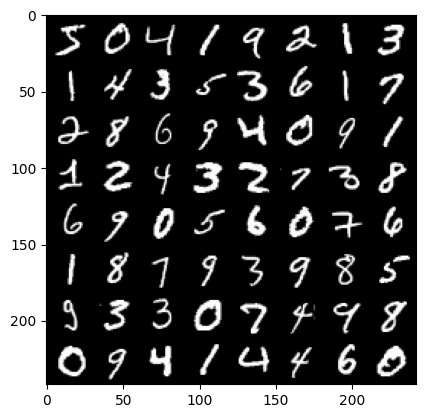

In [7]:
# show the real images
show_and_save(make_grid(v.view(batch_size, 1, 28, 28).data), 'output/real')

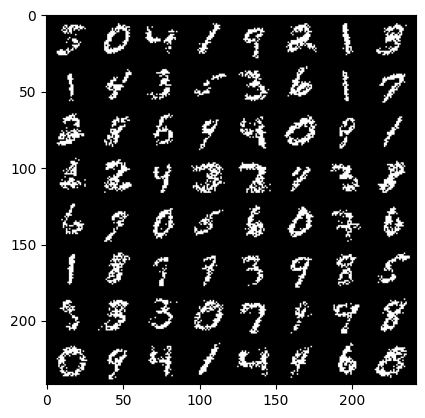

In [8]:
# show the generated images
show_and_save(make_grid(v_gibbs.view(batch_size, 1, 28, 28).data), 'output/fake')

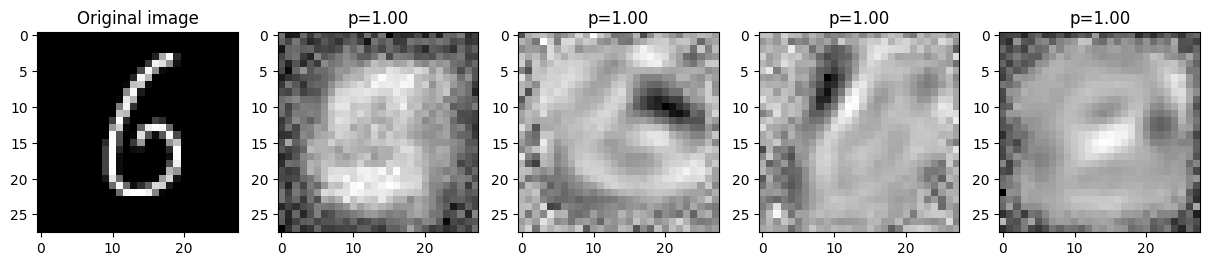

In [9]:
n_sample = 4
kth = 18
d = images[kth:kth+1]

V = torch.sigmoid(F.linear(d.view(1, -1), model.W, model.h))
v, o = torch.sort(V.view(-1))

fig, ax = plt.subplots(1, n_sample + 1, figsize=(3*(1 + n_sample),3))
ax[0].imshow(d.view(28, 28).numpy(), cmap='gray')
ax[0].set_title('Original image')

for k, i in enumerate(o[-n_sample:].numpy()):
    f = model.W[i].view(28, 28).data.numpy()
    ax[k + 1].imshow(f, cmap='gray')
    ax[k + 1].set_title('p=%.2f'% V[0][i].item())
    
plt.savefig('output/factor.png', dpi=200)